In [122]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

In [123]:
def expser(n,x,e=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# e - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*e*rn.random()-e
        y+=b*(1.+r)
    return y

In [124]:
def expserlist(n,xlist,e=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument *list*
# e - relative error in computation of the series terms, modeled by uniform noise
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,e))
    return ylist

In [125]:
def errxlist(n,xlist,e):
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,e)-np.exp(x))
    return yy

In [126]:
def errelist(n,x,elist):
    yy = []
    for e in elist: 
        yy.append(expser(n,x,e)-np.exp(x))
    return yy

In [127]:
def errnlist(nlist,x,e):
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,e)-np.exp(x))
    return yy

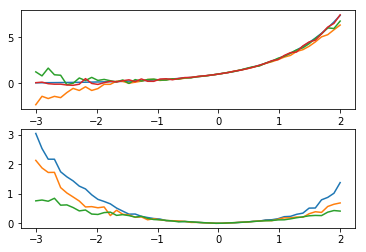

In [136]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
e=.1
kmax=20

f,(ax1,ax2) = plt.subplots(2)
ax1.plot(xlist,np.exp(xlist))
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,e))
for n in nlist: 
    y=np.abs(errxlist(n,xlist,e))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,e))
        y=np.maximum(y,z)
    ax2.plot(xlist,y)

plt.show()

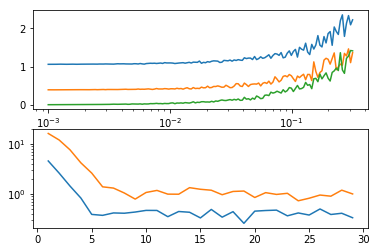

In [148]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
xlist = [2,3]
nlist1=range(1,30)
e=.1
kmax=20

f,(ax1,ax2) = plt.subplots(2)
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    ax1.plot(elist,y)
for x in xlist:
    y=np.abs(errnlist(nlist1,x,e))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist1,x,e))
        y=np.maximum(y,z)
    ax2.plot(nlist1,y)

ax1.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xscale('log')
plt.show()